In [24]:
!pip install sep

!pip install fitsio
!pip install matplotlib
!pip install numpy
!pip install astropy
!apt-get install fitsio
!pip show fitsio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitsio: filename=fitsio-1.2.1-cp310-cp310-linux_x86_64.whl size=818009 sha256=6d77587f1bc7b4b2699bbb2154a9a1a9ec5769ccfa54b3aca23e6983469748e2
  Stored in directory: /root/.cache/pip/wheels/94/70/18/2789914e7e79d73c282daba3cc5e5984c5e9a84962f68bf7bc
Successfully built fitsio
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fitsio
Name: fitsio
Version: 1.2.1
Summary: A full featured python library to read from and write to FITS files.
Home-page: https://github.com/esheldon/fitsio
Author: Erin Scott Sheldon
Author-email: erin.sheldon@gmail.com
License: GPL
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: 


In [25]:
!pip install fitsio numpy

In [26]:
!pip install --upgrade fitsio

In [27]:
import sep
import numpy as np

In [28]:

# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [29]:
!pip install astropy
from astropy.io import fits
fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

In [30]:
from astropy.io import fits
hdul = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

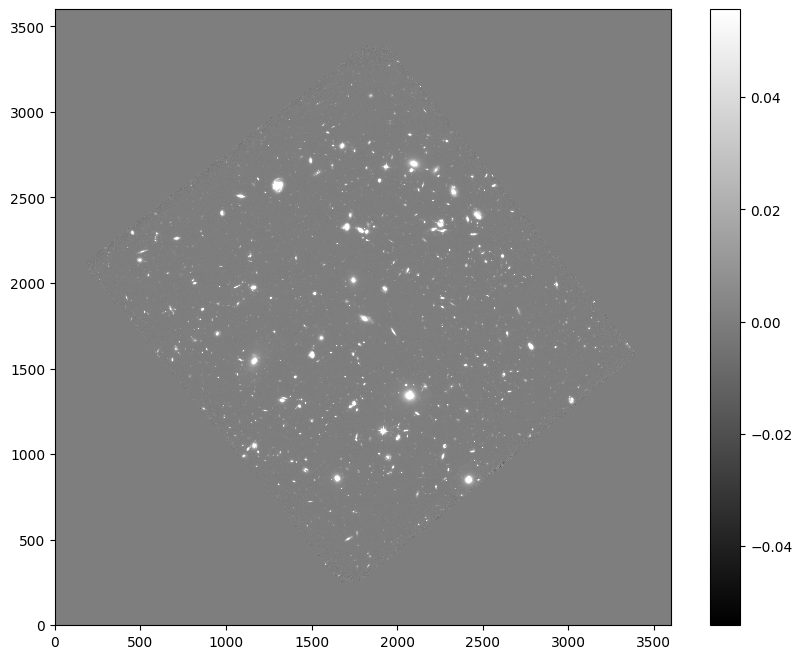

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data = hdul[0].data
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("/content/image_plot1.1.png")
plt.show()

In [33]:
!pip install sep
import sep
data.dtype
if data.dtype.byteorder != 'little':
    data = data.byteswap().newbyteorder()

bkg = sep.Background(data)

In [34]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [35]:
bkg_image = bkg.back()

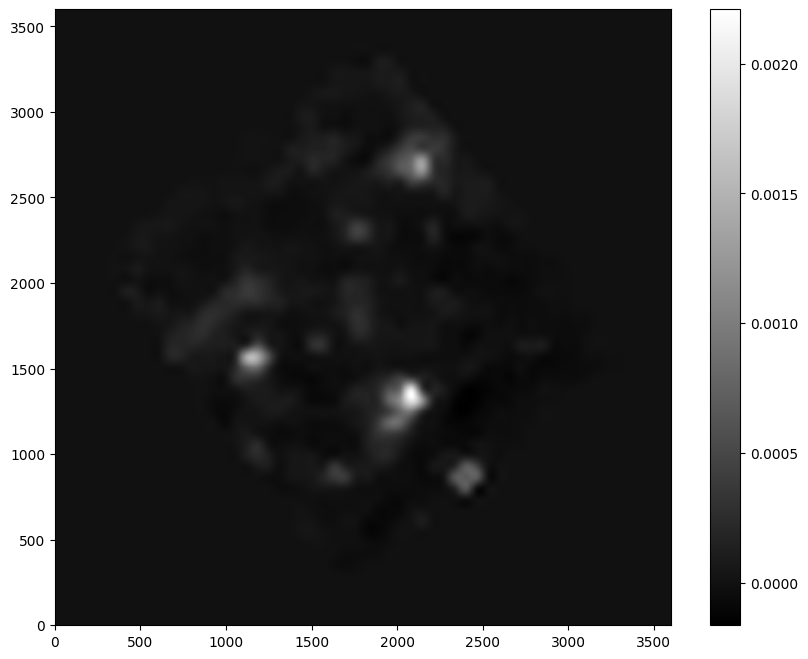

In [37]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("/content/image_plot2.2.png")
plt.show()

In [38]:
bkg_rms = bkg.rms()

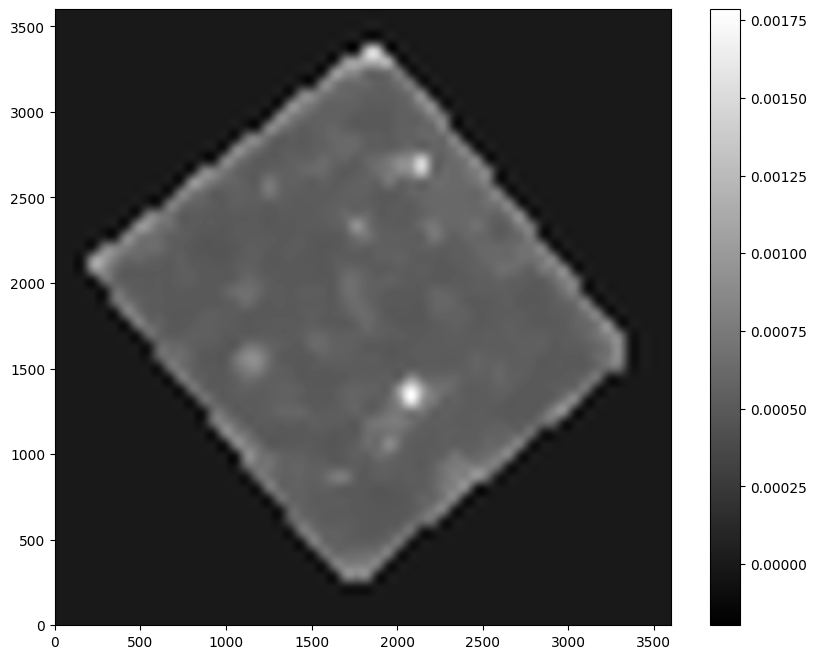

In [39]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("/content/image_plot3.3.png")
plt.show()

In [40]:
data_sub = data - bkg


In [41]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [42]:
len(objects)

8643

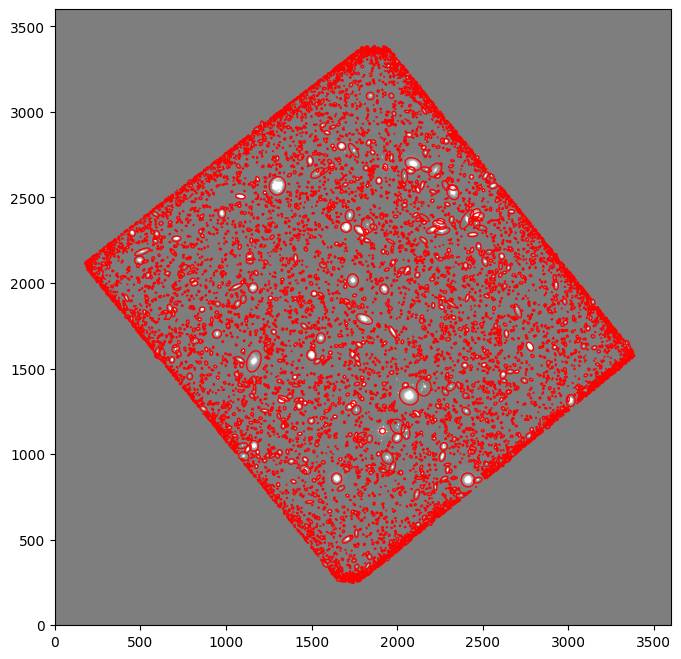

In [43]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("/content/image_plot4.4.png")
plt.show()


In [44]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [45]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [46]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


In [ ]:
#part 7

In [47]:
from scipy import stats
data = [
    (0.031282, 0.176890),
    (0.031018, 0.176142),
    (-0.024388, 0.002883),
    (0.001947, 0.044219),
    (0.012457, 0.111649),
    (-0.011228, 0.002875),
    (0.029368, 0.171394),
    (-0.009126, 0.002875),
    (0.048023, 0.219161),
    (0.027840, 0.166877)
]
flux_values = [value[0] for value in data]
uncertainties = [uncertainty[1] for uncertainty in data]
flux_values = np.array(flux_values)
uncertainties = np.array(uncertainties)

In [ ]:
mean_flux = np.mean(flux_values)
median_flux = np.median(flux_values)
mode_flux = stats.mode(flux_values)[0]

In [ ]:
print("Mean flux:", mean_flux)

Mean flux: 0.013719299999999999


In [ ]:
print("Median flux:", median_flux)

Median flux: 0.0201485


In [ ]:
print("Mode flux:", mode_flux)

Mode flux: -0.024388


In [ ]:
flux_values = [value[0] for value in data]

In [ ]:
std_dev_flux = np.std(flux_values)
print("Standard deviation of fluxes:", std_dev_flux)

Standard deviation of fluxes: 0.022283032868305876


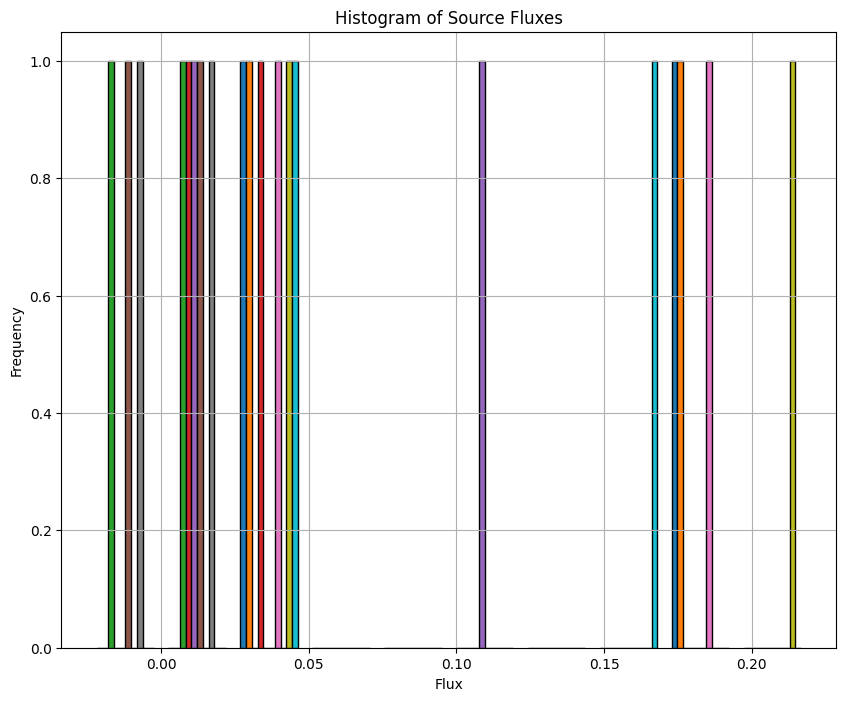

In [57]:
import matplotlib.pyplot as plt

source_fluxes = [
    (0.031282, 0.176890),
    (0.031018, 0.176142),
    (-0.024388, 0.002883),
    (0.001947, 0.044219),
    (0.012457, 0.111649),
    (-0.011228, 0.002875),
    (0.029368, 0.171394),
    (-0.009126, 0.002875),
    (0.048023, 0.219161),
    (0.027840, 0.166877)
]


plt.hist(source_fluxes, bins=10, edgecolor='black')
plt.xlabel('Flux')
plt.ylabel('Frequency')
plt.title('Histogram of Source Fluxes')
plt.grid(True)
plt.show()

In [2]:
#Finding the Largest Outlier the Histogram
import numpy as np

flux_data = np.array([
    [0.031282, 0.176890],
    [0.031018, 0.176142],
    [-0.024388, 0.002883],
    [0.001947, 0.044219],
    [0.012457, 0.111649],
    [-0.011228, 0.002875],
    [0.029368, 0.171394],
    [-0.009126, 0.002875],
    [0.048023, 0.219161],
    [0.027840, 0.166877]
])

# Sort the flux data
sorted_flux_data = flux_data[np.argsort(flux_data[:, 0])]

largest_outlier = sorted_flux_data[-1]

mean_flux = np.mean(sorted_flux_data[:, 0])
std_flux = np.std(sorted_flux_data[:, 0])

z_score = (largest_outlier[0] - mean_flux) / std_flux

print("Largest outlier:", largest_outlier)
print("Mean of flux:", mean_flux)
print("Standard deviation of flux:", std_flux)
print("The largest outlier:", z_score)


Largest outlier: [0.048023 0.219161]
Mean of flux: 0.0137193
Standard deviation of flux: 0.022283032868305876
The largest outlier: 1.5394538168451766


In [ ]:
#part 8

In [15]:
from astropy.io import fits

# file names
fdata_1 = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_2 = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_3 = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"
#  data
hdu_2 = fits.open(fdata_1)
hdu_3 = fits.open(fdata_2)
hdu_4 = fits.open(fdata_3)
#image data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

In [16]:
def rescale_image(data):
    # copy the data
    pdata_tmp = data.copy()
    # compute the mean value over all data
    m = np.nanmean(pdata_tmp)
    # if lower than vpmin, apply vpmin
    # if higher than vpmax, apply vpmax
    vpmin = 0.5*m
    vpmax = 100*m
    pdata_tmp[pdata_tmp<vpmin] = vpmin
    pdata_tmp[pdata_tmp>vpmax] = vpmax
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp

In [17]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp = rescale_image(data)
    plt.imshow(pdata_tmp)

In [18]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp = rescale_image(data)
    plt.imshow(pdata_tmp)

In [19]:
data_all = np.zeros([data_2.shape[0],data_2.shape[1],3])
data_all[:,:,0] = data_2
data_all[:,:,1] = data_3
data_all[:,:,2] = data_4
data_all = rescale_image(data_all)

In [20]:
def remap(data):
    #copy the data to avoid overwriting it
    pdata_tnp = data.copy()
    dmin = pdata_tnp.min()
    dmax = pdata_tnp.max()
    return (pdata_tnp - dmin)/(dmax-dmin)

In [21]:
rgb_image = np.zeros([data_2.shape[0],data_2.shape[1],3])
rgb_image = remap(data_all)

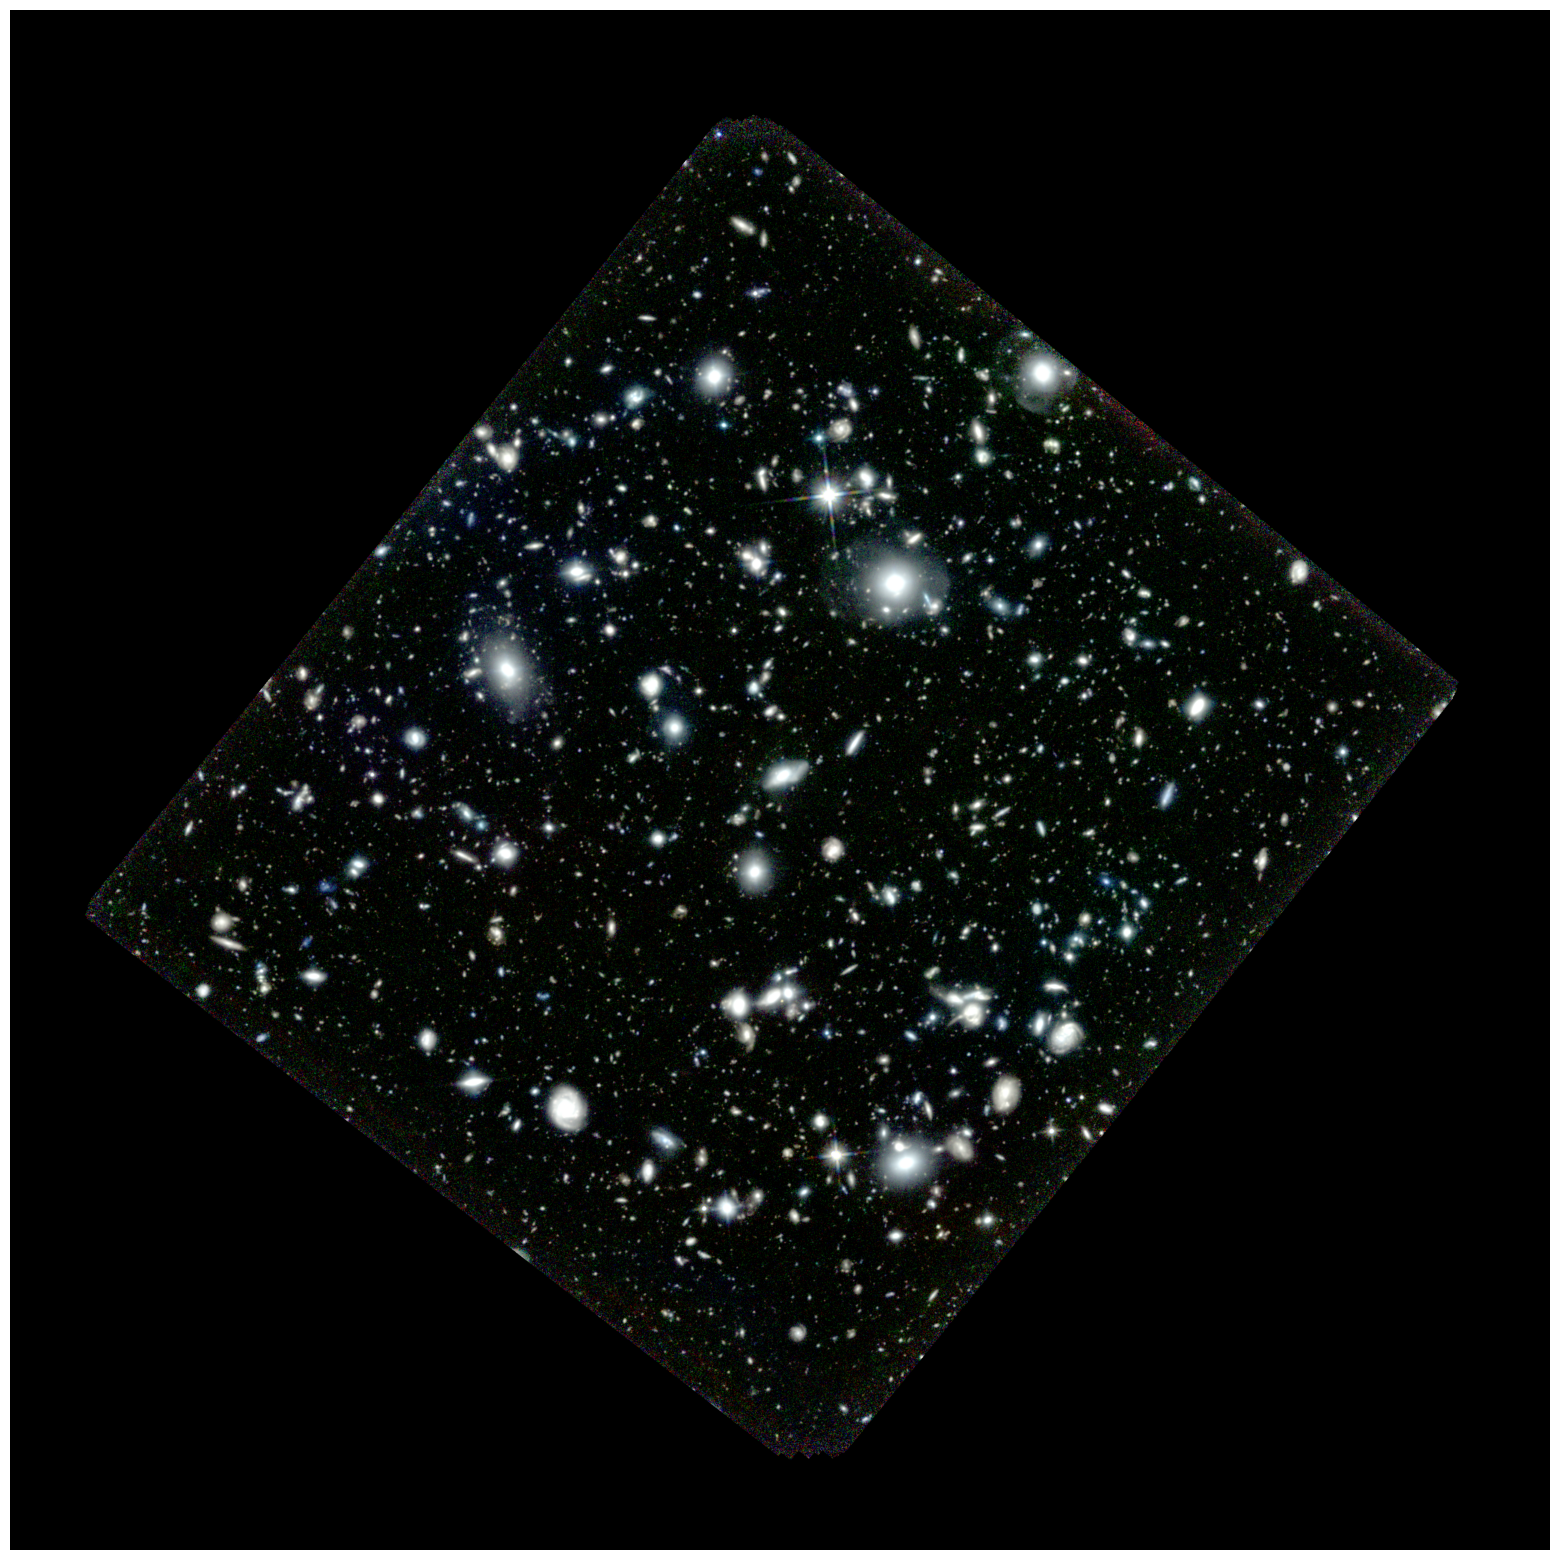

In [58]:
f,ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb_image)
plt.savefig('FINAL.png', dpi=600, bbox_inches='tight')